# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [11]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [21]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,782,87,44,98,211,70,10,189,35,22,141,214,535,178,71,2,21,187,194
1,414,85,45,82,133,56,11,159,43,20,156,170,362,173,76,10,21,183,193
2,815,81,45,68,154,69,22,151,45,19,147,186,335,186,88,1,10,180,185
3,275,87,44,70,179,75,6,146,45,19,141,167,326,178,69,6,1,194,201
4,755,86,39,58,125,55,5,117,57,17,134,140,204,148,69,7,6,190,194
5,377,87,37,60,132,57,6,128,52,18,129,154,243,132,71,1,14,186,192
6,822,95,41,82,170,65,9,145,46,19,145,163,314,140,64,4,8,199,207
7,769,91,36,83,162,61,8,142,47,19,128,163,298,137,63,0,31,193,200
8,771,97,48,105,212,64,11,201,33,23,155,212,602,162,64,2,7,193,202
9,199,82,44,72,136,61,7,147,46,19,143,173,317,183,81,6,17,181,185


Methods `describe` and `info` deliver some useful information.

In [22]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,418.249545,93.493625,44.927140,82.045537,169.519126,61.970856,8.599271,169.145719,40.821494,20.615665,147.978142,188.972678,441.373406,175.377049,72.655738,6.437158,12.697632,188.805100,195.540984
std,248.342486,8.228625,6.149163,15.744299,33.905489,8.331798,4.939015,32.983029,7.733059,2.573697,14.579491,31.552950,175.830596,32.460783,7.704858,4.987408,8.836285,6.166803,7.364881
min,0.000000,73.000000,33.000000,40.000000,105.000000,47.000000,3.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,182.000000
25%,204.000000,87.000000,40.000000,70.000000,142.000000,57.000000,6.000000,147.000000,33.000000,19.000000,137.000000,168.000000,321.000000,150.000000,67.000000,2.000000,6.000000,184.000000,190.000000
50%,412.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,365.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,636.000000,99.000000,50.000000,98.000000,195.000000,66.000000,10.000000,197.000000,46.000000,23.000000,160.000000,217.000000,579.000000,199.000000,76.000000,10.000000,19.000000,193.000000,201.000000
max,845.000000,117.000000,58.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,180.000000,320.000000,1018.000000,262.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [23]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [24]:
## YOUR CODE HERE: здесь я сделал нормализацию данных, используя среднее значение и отклонение.
for i, m, s in zip(X_train_pd.columns, X_train_pd.mean(), X_train_pd.std()):
    X_train_pd[i] = (X_train_pd[i] - m) / s
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.464713,-0.789151,-0.150775,1.013349,1.223427,0.963675,0.283605,0.601954,-0.752806,0.537878,-0.478627,0.793185,0.532482,0.080804,-0.214895,-0.889672,0.939577,-0.292712,-0.209234
1,-0.017112,-1.032205,0.011849,-0.002892,-1.077086,-0.716635,0.486074,-0.307604,0.281713,-0.239214,0.550215,-0.601296,-0.451420,-0.073228,0.434046,0.714367,0.939577,-0.941347,-0.345014
2,1.597594,-1.518313,0.011849,-0.892103,-0.457717,0.843653,2.713239,-0.550153,0.540343,-0.627760,-0.067090,-0.094212,-0.604977,0.327255,1.991505,-1.090177,-0.305290,-1.427822,-1.431250
3,-0.576823,-0.789151,-0.150775,-0.765073,0.279627,1.563785,-0.526273,-0.701746,0.540343,-0.627760,-0.478627,-0.696375,-0.656162,0.080804,-0.474472,-0.087652,-1.323818,0.842398,0.741223
4,1.355992,-0.910678,-0.963894,-1.527254,-1.313036,-0.836657,-0.728743,-1.580986,2.092123,-1.404853,-0.958754,-1.552079,-1.350012,-0.843388,-0.474472,0.112853,-0.757969,0.193763,-0.209234
5,-0.166099,-0.789151,-1.289141,-1.400223,-1.106580,-0.596613,-0.526273,-1.247482,1.445548,-1.016307,-1.301701,-1.108381,-1.128208,-1.336291,-0.214895,-1.090177,0.147389,-0.454871,-0.480793
6,1.625781,0.183065,-0.638646,-0.002892,0.014183,0.363564,0.081135,-0.732065,0.669658,-0.627760,-0.204269,-0.823146,-0.724410,-1.089840,-1.123413,-0.488662,-0.531630,1.653190,1.555900
7,1.412366,-0.303043,-1.451765,0.060623,-0.221767,-0.116524,-0.121334,-0.823021,0.798973,-0.627760,-1.370291,-0.823146,-0.815406,-1.182259,-1.253201,-1.290682,2.071274,0.680239,0.605443
8,1.420419,0.426119,0.499720,1.457954,1.252920,0.243542,0.486074,0.965778,-1.011436,0.926424,0.481626,0.729799,0.913530,-0.412099,-1.123413,-0.889672,-0.644799,0.680239,0.877002
9,-0.882852,-1.396786,-0.150775,-0.638043,-0.988605,-0.116524,-0.323804,-0.671428,0.669658,-0.627760,-0.341448,-0.506218,-0.707348,0.234836,1.082987,-0.087652,0.486898,-1.265664,-1.431250


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

Best Hyperparameters: {'C': 0.1}
F1 Score: 0.7259392607988521
Accuracy: 0.7407407407407407


<Figure size 1000x600 with 0 Axes>

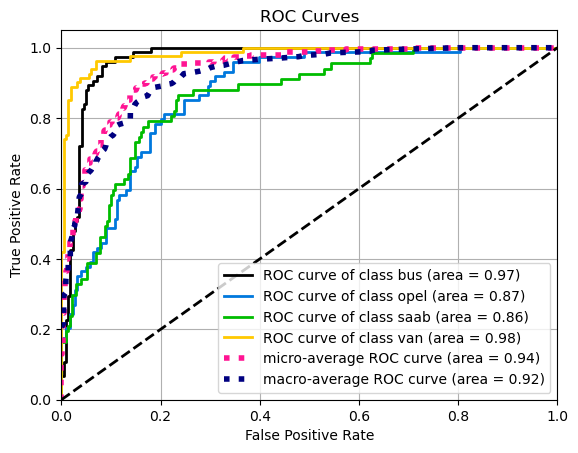

In [25]:
### YOUR CODE HERE
# примеры я смотрел здесь:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# ATTENTION: если появится ошибка запуска, то измените max_iter = 1000 или значение больше.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from scikitplot.metrics import plot_roc
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

reg = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 1000)
grid = {'C':[0.01, 0.1, 1, 10]}
gridSearch = GridSearchCV(reg, grid)
gridFit = gridSearch.fit(X_train, y_train)

y_pred = gridFit.predict(X_test) 
y_prob = gridSearch.fit(X_train, y_train)

print(f'Best Hyperparameters: {gridSearch.best_params_}')
print(f'F1 Score: {f1_score(y_test, y_pred, average = "macro")}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Plot ROC curve:
plt.figure(figsize=(10, 6))
plot_roc(y_test, gridFit.predict_proba(X_test))
plt.grid()
plt.show()

In [26]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

!pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

PCA ratio: [6.31502426e-01 3.52769881e-01 6.95769654e-03 4.63288462e-03
 1.56139607e-03 7.69365236e-04 4.81860173e-04 4.34559905e-04
 2.89691150e-04 2.32328940e-04 1.09819090e-04 9.44533647e-05
 6.03547850e-05 4.95136408e-05 2.55018038e-05 1.82582947e-05
 6.91962418e-06 2.35402213e-06 7.35591955e-07]


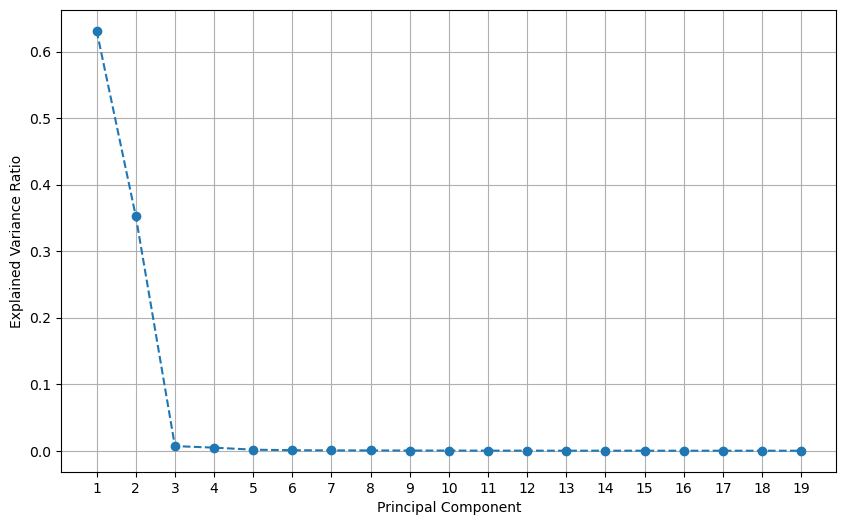

In [27]:
### YOUR CODE HERE
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
ratio = pca.explained_variance_ratio_
print("PCA ratio:", ratio)

# Plot PCA curve:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(ratio) + 1), ratio, marker = 'o', linestyle = '--')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(ratio) + 1))
plt.grid()
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [28]:
### YOUR CODE HERE

DISP_BORDER = 0.99

# Посчитаем дисперсию при разном количестве компонент и замечаем, что с 3-го компонента почти ничего не меняется:
for index in range(0, 19, 1):
    print(index + 1, np.cumsum(pca.explained_variance_ratio_)[index])
    
nComponents = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= DISP_BORDER) + 1
print("\nAmount of components:", nComponents)

# Будет достаточно двух компонентов, ведь общая объясненная дисперсия уже на этом шаге будет близка к единице.
# Можно выбрать и 3 компонента, но двух будет достаточно (самое главное - не один). Параметр DISP_BORDER можно варьировать.
# Также заметим, что объясненная дисперсия равна единице при 19 компонентах.
# За результатом можно пронаблюдать в следующем пункте в зависимости от числа компонент.

1 0.6315024264077792
2 0.9842723071439885
3 0.9912300036836057
4 0.9958628883081438
5 0.9974242843784914
6 0.9981936496142925
7 0.9986755097875887
8 0.9991100696926203
9 0.9993997608431193
10 0.9996320897829023
11 0.9997419088727837
12 0.9998363622374762
13 0.9998967170224413
14 0.9999462306632182
15 0.9999717324670016
16 0.9999899907617319
17 0.9999969103859108
18 0.9999992644080449
19 1.0000000000000002

Amount of components: 3


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Best Hyperparameters: {'C': 1}
F1 Score: 0.7908871458025366
Accuracy: 0.8013468013468014


<Figure size 1000x600 with 0 Axes>

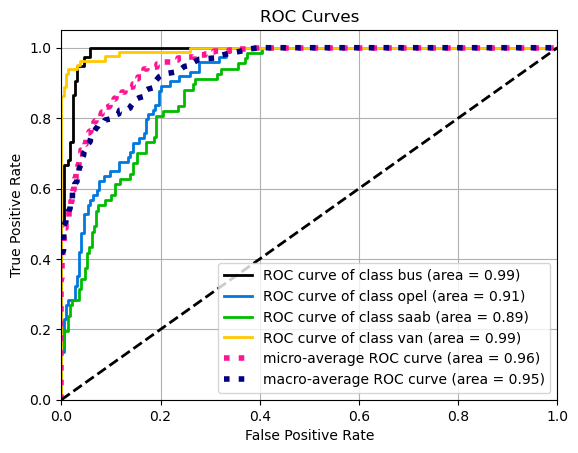

In [39]:
### YOUR CODE HERE
# Я написал функцию, в которую можно подставлять разное число компонент. В данном случае подставляется для 19, но можно выбрать
# и другое значение, например, исходя из рассуждений в предыдущем пункте.

N_COMPONENTS = 19

def execute(n_components):
    pcaOpt = PCA(n_components)
    pcaOpt.fit(X_train)
    X_train_pca = pcaOpt.fit_transform(X_train)
    X_test_pca = pcaOpt.transform(X_test)
    
    reg = LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 1000)
    grid = {'C':[0.01, 0.1, 1, 10]}
    gridSearch = GridSearchCV(reg, grid)
    gridFit = gridSearch.fit(X_train_PCA, y_train)
    
    return X_train_pca, X_test_pca, gridSearch, gridFit
    
X_train_PCA, X_test_PCA, gridSearch, gridFit = execute(N_COMPONENTS)
y_pred = gridFit.predict(X_test_PCA) 
y_prob = gridSearch.fit(X_train_PCA, y_train)

print(f'Best Hyperparameters: {gridSearch.best_params_}')
print(f'F1 Score: {f1_score(y_test, y_pred, average = "macro")}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Plot ROC curve:
plt.figure(figsize=(10, 6))
plot_roc(y_test, gridFit.predict_proba(X_test_PCA))
plt.grid()
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

BEST PARAMS: {'max_depth': 25}
F1 Score: 0.7124864619362051
Accuracy: 0.7138047138047138


<Figure size 1000x600 with 0 Axes>

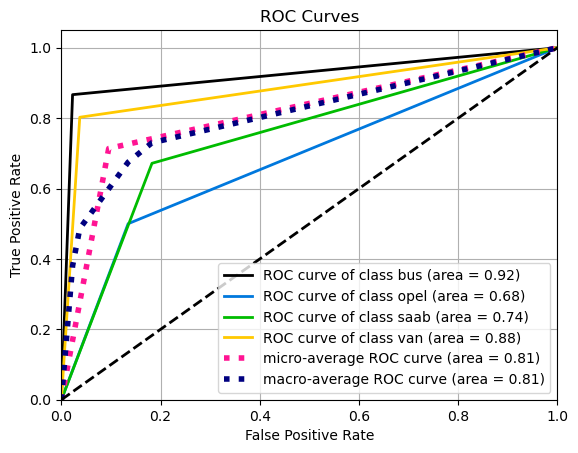

In [40]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid = {'max_depth': np.arange(10, 100, 5)})
gridFit = gridSearch.fit(X_train, y_train)

print("BEST PARAMS:", gridFit.best_params_)

bestEst = gridSearch.best_estimator_
bestEst.fit(X_train, y_train)
y_pred = bestEst.predict(X_test)

print(f'F1 Score: {f1_score(y_test, y_pred, average = "macro")}')
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

# Plot curve:
plt.figure(figsize=(10, 6))
plot_roc(y_test, gridFit.predict_proba(X_test))
plt.grid()
plt.show()

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

from sklearn.ensemble import BaggingClassifier

ensemble = np.arange(2, 100, 5)

def bagging(est):
    f1Scores = []
    acScores = []
    
    for i in ensemble:
        bagClassifier = BaggingClassifier(est, i)
        bagClassifierFit = bagClassifier.fit(X_train, y_train)
        y_pred = bagClassifierFit.predict(X_test)
        f1Scores.append(f1_score(y_test, y_pred, average = 'macro'))
        acScores.append(accuracy_score(y_test, y_pred))
        
    print(f'f1:{np.array(f1Scores)} -> {np.mean(np.array(f1Scores))}\n')
    print(f'accuracy:{np.array(acScores)} -> {np.mean(np.array(acScores))}')
    
    return f1Scores, acScores

# DECISION TREE CLASSIFIER:
f1Scores, acScores = bagging(DecisionTreeClassifier())

plt.xlabel("Estimators")
plt.ylabel("Metric score")
plt.plot(ensemble, f1Scores, label = 'f1')
plt.plot(ensemble, acScores, label = 'accuracy')
plt.legend(loc = 'lower right')
plt.show()

In [ ]:
# LOGISTIC REGRESSION:
f1Scores, acScores = bagging(LogisticRegression(multi_class = 'multinomial', solver = 'saga', tol = 1e-3, max_iter = 500))

plt.xlabel("Estimators")
plt.ylabel("Metric score")
plt.plot(ensemble, f1Scores, label = 'f1')
plt.plot(ensemble, acScores, label = 'accuracy')
plt.legend(loc = 'lower right')
plt.show()

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE
ensemble = np.arange(2, 100, 5)

f1Scores = []
acScores = []
f1Scores, acScores = bagging(RandomForestClassifier())
plt.xlabel("Estimators")
plt.ylabel("Metric score")
plt.plot(ensemble, f1Scores, label = 'f1')
plt.plot(ensemble, acScores, label = 'accuracy')
plt.legend(loc = 'lower right')
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE